# Plotting the Performance Test Results

We use this notebook to plot the results of the [performance_profiling](https://github.com/iloudaros/LoudVA/blob/main/ansible/performance_profiling.yaml) play, that collects results for different Jetson Configurations.


In [8]:
import matplotlib.pyplot as plt
import os
import csv
device = 'xavier-nx-00'
measurement_dir = f'/home/louduser/LoudVA/measurements/{device}/measurements/performance'

### A small plotting function

In [9]:
import matplotlib.pyplot as plt
import os

def plot(folder_path, row_number, row_name, title):
  # Get filenames sorted by the highest integer in their names (descending order)
  filenames = sorted(os.listdir(folder_path), reverse=True)

  colors = plt.colormaps['tab20c']
  plt.figure(figsize=(13, 8))  # Adjust width and height as needed

  for i, filename in enumerate(filenames):
    filepath = os.path.join(folder_path, filename)
    inferences_per_second = []
    concurrency = []

    with open(filepath, 'r') as csvfile:
      reader = csv.reader(csvfile, delimiter=',')
      next(reader)  # Skip the header row

      # Read data and sort it by the first column
      data = sorted(reader, key=lambda row: float(row[0]))
      for row in data:
        concurrency.append(float(row[0]))
        inferences_per_second.append(float(row[row_number]))

    plt.plot(concurrency, inferences_per_second, label=filename.split("_")[-1].split(".")[0], marker='o', linestyle='-', color=colors(i))

  plt.xlabel("Concurrency")
  plt.ylabel(row_name)
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()

## Plotting the results of the GPU Frequency Test

### Inferences per second

StopIteration: 

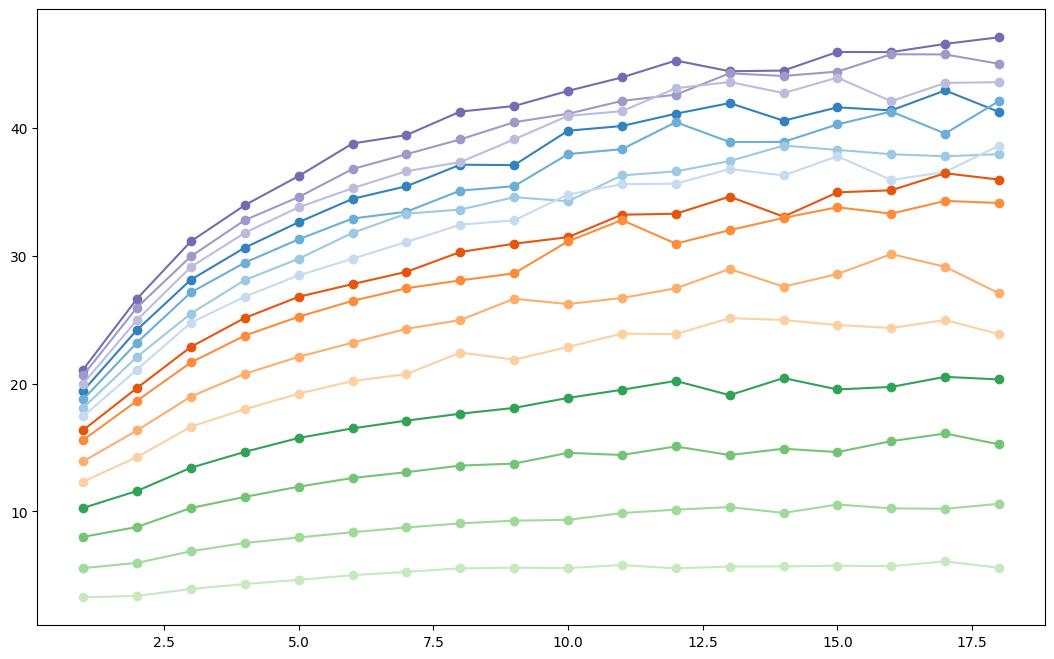

In [10]:
plot(f"{measurement_dir}/freqs", 1, "Inferences/Second", "Inferences/Second vs Concurrency")

### Latency

StopIteration: 

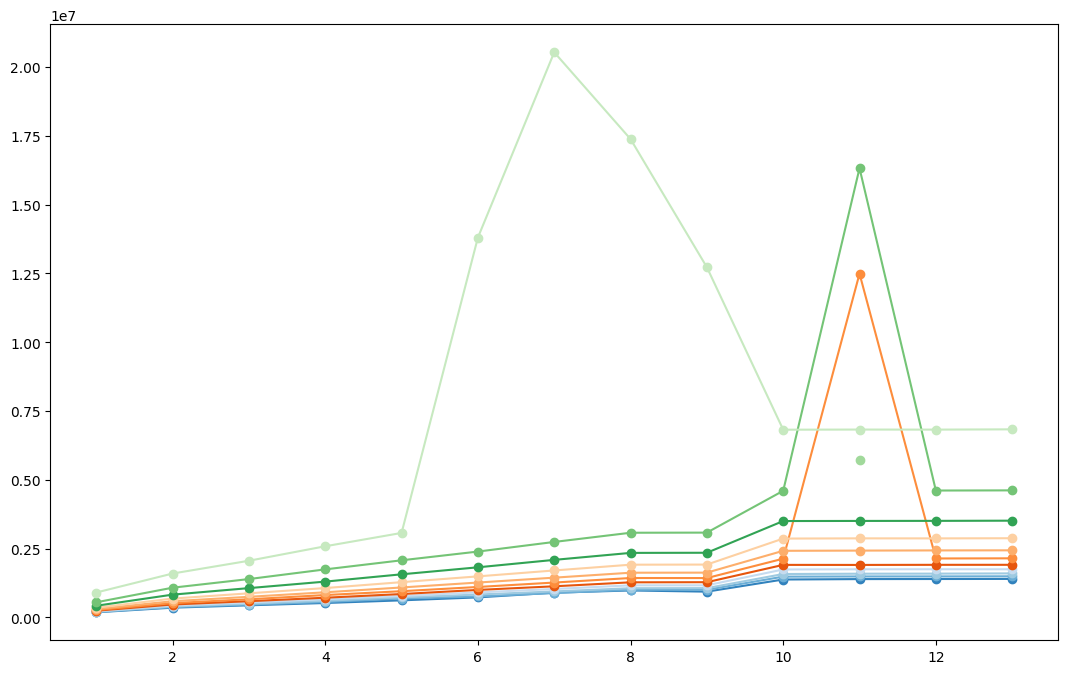

In [ ]:
plot(f"{measurement_dir}/freqs", 9, "p50 Latency in ms", "p50 Latency vs Concurrency")
plot(f"{measurement_dir}/freqs", 10, "p90 Latency in ms", "p90 Latency vs Concurrency")
plot(f"{measurement_dir}/freqs", 12, "p99 Latency in ms", "p99 Latency vs Concurrency")

## Plotting the results of the Power Mode Test


### Inferences per second

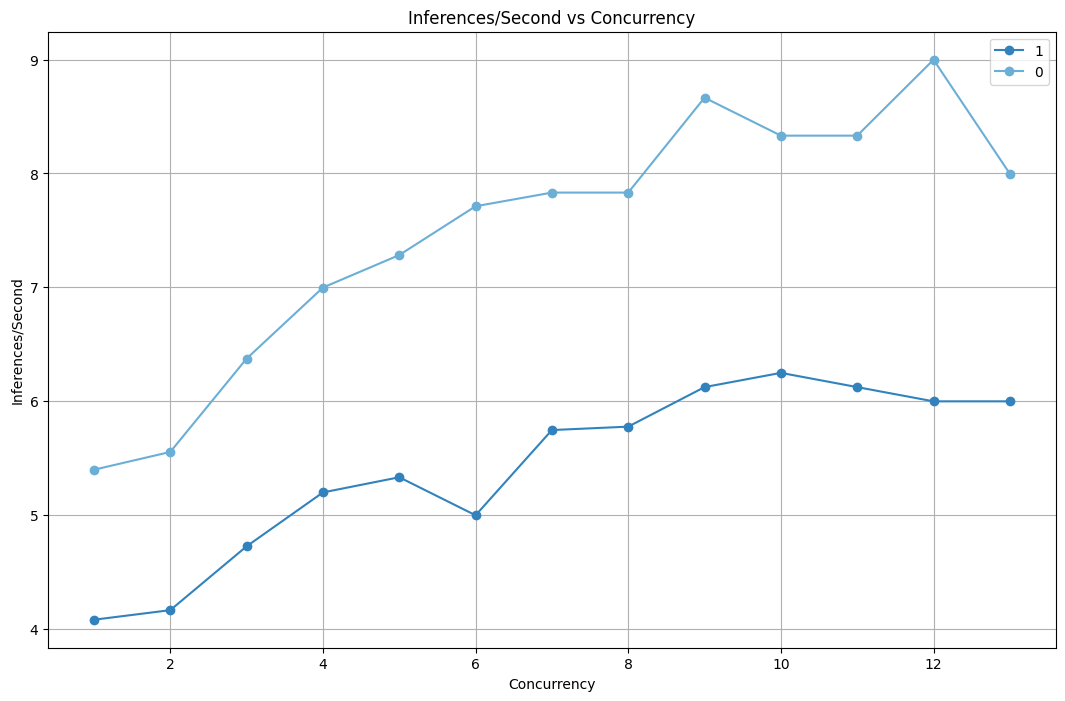

In [ ]:
plot(f"{measurement_dir}/modes", 1, "Inferences/Second", "Inferences/Second vs Concurrency")

### Latency

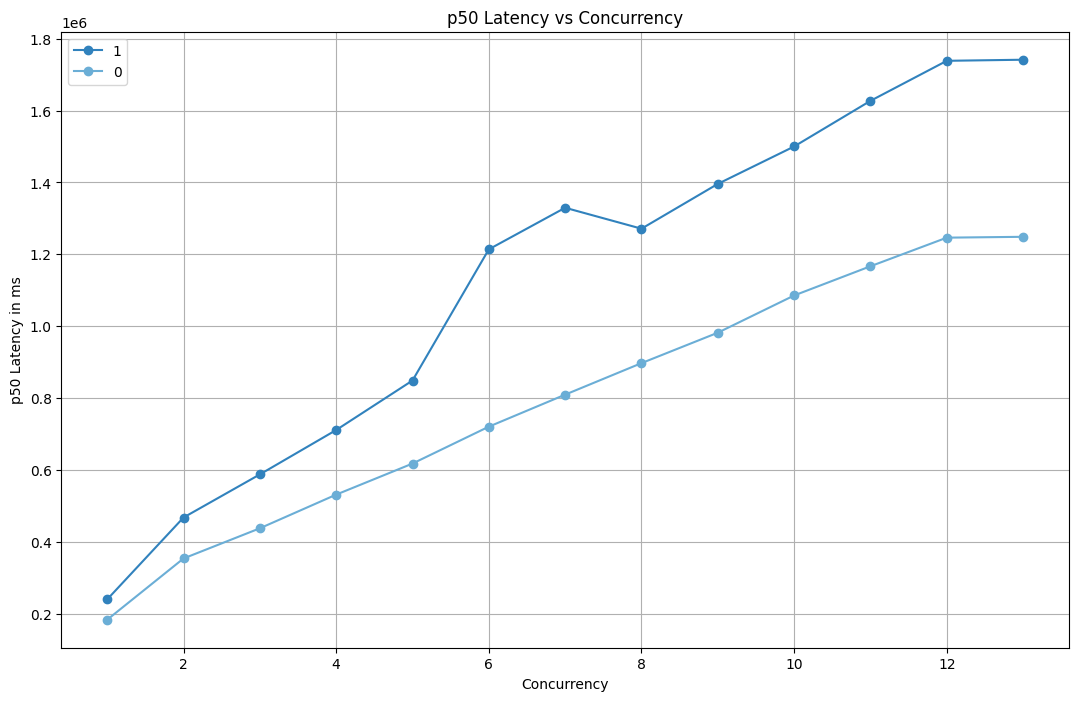

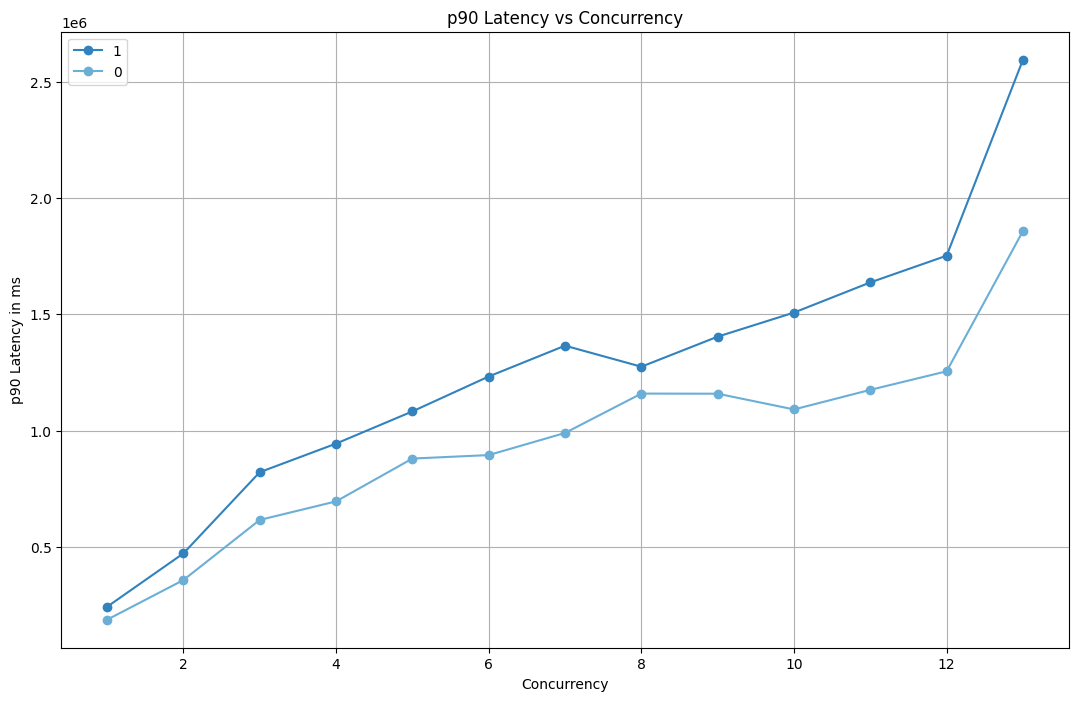

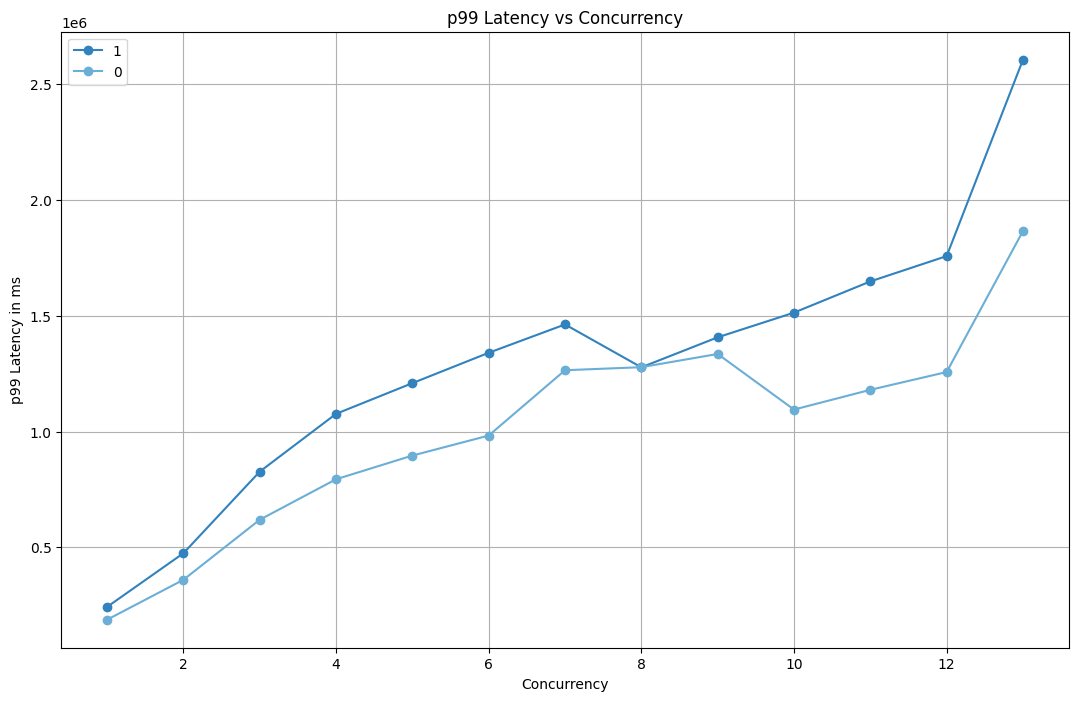

In [ ]:
plot(f"{measurement_dir}/modes", 9, "p50 Latency in ms", "p50 Latency vs Concurrency")
plot(f"{measurement_dir}/modes", 10, "p90 Latency in ms", "p90 Latency vs Concurrency")
plot(f"{measurement_dir}/modes", 12, "p99 Latency in ms", "p99 Latency vs Concurrency")